/data/keeling/a/yulanh/mydata/OT_modis/plot_output/hc_record_information_gpm_modis_1505_update_2018.txt
[127.721115  -49.52348     0.6760114   0.          1.          1.
   3.       ]
/data/keeling/a/yulanh/mydata/OT_modis/plot_output/hc_record_information_gpm_modis_1505_update_2019.txt
[148.78696    46.01589     0.6428854   0.          0.          1.
   0.       ]
/data/keeling/a/yulanh/mydata/OT_modis/plot_output/hc_record_information_gpm_modis_1505_update_2020.txt
[-172.86995     38.481728     0.6657522    0.           1.
    1.           0.       ]


<ipython-input-45-19c2465ea8ce>:211: RuntimeWarning: invalid value encountered in true_divide
  Trop_NOT_frac=trop_NOT_num/trop_Allnum
<ipython-input-45-19c2465ea8ce>:217: RuntimeWarning: invalid value encountered in true_divide
  p01=ax[0].plot(x,trop_OT_num/trop_Allnum,'gray',linewidth=2,marker='o',markersize=9)#,mfc='none')
<ipython-input-45-19c2465ea8ce>:218: RuntimeWarning: invalid value encountered in true_divide
  p02=ax[0].plot(x,trop_LOT_num/trop_Allnum,'lightgray',linewidth=2,marker='o',markersize=9)#,mfc='none')
<ipython-input-45-19c2465ea8ce>:232: RuntimeWarning: invalid value encountered in true_divide
  print('tropical ot frac',trop_OT_num/trop_Allnum)
<ipython-input-45-19c2465ea8ce>:240: RuntimeWarning: invalid value encountered in true_divide
  print('midlatitude NOT frac',mid_NOT_num/mid_Allnum)
<ipython-input-45-19c2465ea8ce>:241: RuntimeWarning: invalid value encountered in true_divide
  print('midlatitude OT frac',mid_OT_num/mid_Allnum)
<ipython-input-45-19c2465ea8c

[  5  15  25  35  45  55  65  75  85  95 105]
tropical not ot frac [       nan        nan 1.         1.         1.         0.63636364
 0.78571429 0.58823529 0.33333333 0.08552632        nan]
tropical ot frac [       nan        nan 0.         0.         0.         0.
 0.07142857 0.05882353 0.33333333 0.80263158        nan]
trop NOT num [ 0.  0.  4.  5.  5.  7. 11. 10. 10. 13.  0.]
trop OT num [  0.   0.   0.   0.   0.   0.   1.   1.  10. 122.   0.]
trop LOT num [ 0  0  0  0  0  4  2  6 10 17  0]
trop all num [  0.   0.   4.   5.   5.  11.  14.  17.  30. 152.   0.] 238.0
476 702 104 114
midlatitude NOT frac [1.         1.         0.98876404 0.98901099 0.97959184 0.91509434
 0.85087719 0.77477477 0.55855856 0.12307692        nan]
midlatitude OT frac [0.         0.         0.         0.         0.01020408 0.
 0.05263158 0.04504505 0.13513514 0.59230769        nan]
mid non OT [ 7 63 88 90 96 97 97 86 62 16  0]
mid  OT [ 0  0  0  0  1  0  6  5 15 77  0]
mid LOT [ 0  0  1  1  1  9 11 20 34 37

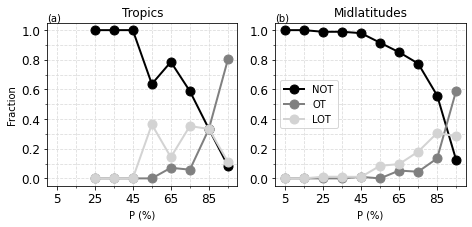

<Figure size 432x288 with 0 Axes>

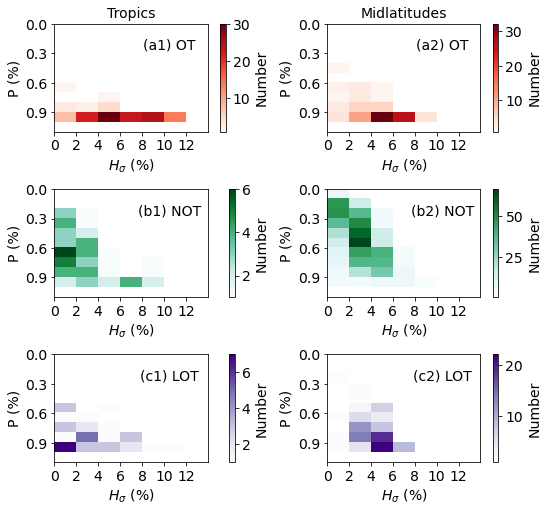

In [45]:

def read_text(fname):
    fo=open(fname,'r') #create file object
    #headstr=fo.readline()
    data=fo.readlines()
    #print (data)
    fo.close()  # close object
    return data

import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
import glob
from pyhdf.SD import SD, SDC
import h5py
import statsmodels.api as sm
from scipy import stats
from math import floor
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fnames=glob.glob('/data/keeling/a/yulanh/mydata/OT_modis/plot_output/hc_record_information_gpm_modis_1505_update_20*')

Nx=11
trop_NOT_num=np.zeros((Nx),'f')
trop_OT_num =np.zeros((Nx),'f')
trop_LOT_num=np.zeros((Nx),'i')
mid_NOT_num=np.zeros((Nx),'i')
mid_OT_num =np.zeros((Nx),'i')
mid_LOT_num=np.zeros((Nx),'i')

trop_NOT_hetero=np.zeros((7),'i')
trop_OT_hetero =np.zeros((7),'i')
trop_LOT_hetero=np.zeros((7),'i')
mid_NOT_hetero=np.zeros((7),'i')
mid_OT_hetero =np.zeros((7),'i')
mid_LOT_hetero=np.zeros((7),'i')
mid_NOT_2d=np.zeros((Nx,7),'i')
mid_OT_2d=np.zeros((Nx,7),'i')
mid_LOT_2d=np.zeros((Nx,7),'i')
trop_NOT_2d=np.zeros((Nx,7),'i')
trop_OT_2d=np.zeros((Nx,7),'i')
trop_LOT_2d=np.zeros((Nx,7),'i')


NOT_hete_p_trop=0
NOT_hete_p_mid=0
OT_hete_p_trop=0
OT_hete_p_mid=0

for fname in fnames:
    print(fname)
    data=read_text(fname)
    splitcol=data[0].split(' ')
    Ncol=len(splitcol)-splitcol.count('')
    Nrow=len(data)
    #rint(Ncol,Nrow)

    dataT=np.zeros((Nrow,Ncol-1),'f')

    colocated_fname = np.chararray(Nrow,itemsize=99)

    for i in range(Nrow):
        splitcol=data[i].split(' ')
        k=0
        for j in range(len(splitcol)):
            if (len(splitcol[j]) == 99):
                colocated_fname[i]=splitcol[j]
            
            if len(splitcol[j]) != 0 and splitcol[j] !='\n' and len(splitcol[j]) != 99:
                dataT[i,k]=float(splitcol[j])
                k=k+1
        
    #print(colocated_fname[0])
    print(dataT[694,:])
    GOTlon=dataT[:,0]
    GOTlat=dataT[:,1]
    OTflag=dataT[:,6] # a flag that from mannually check 0-NOT, 1-OT, 3-night time, 2-likely OT
    Proba =dataT[:,2]

#plt.plot(OTflag,'ro')
    index=np.where(OTflag != 3)
    index=index[0]
    Totnum=index.shape
    Totnum=Totnum[0]

    OTflag1=OTflag[index]
    Proba1 =Proba[index]
    GOTlon =GOTlon[index]
    GOTlat =GOTlat[index]
    colocated_fname1=colocated_fname[index]

    hetero_OT=np.zeros((Totnum),'f')
    hetero_Ci=np.zeros((Totnum),'f')
    hetero_OTCi=np.zeros((Totnum),'f')
    hetero_di=np.zeros((Totnum),'f')
    
    for fi in np.arange(Totnum):

    # read the spatial data
        tpfname=colocated_fname1[fi]
        #print(tpfname)
        data=read_text(tpfname)
        splitcol=data[0].split(' ')
        MODNcol=len(splitcol)-splitcol.count('')
        MODNrow=len(data)
        #print(MODNcol,MODNrow)
        # transfer data from string to float
        dataT=np.zeros((MODNrow,MODNcol),'f') 
        for i in range(MODNrow):
            splitcol=data[i].split(' ')
            #print(splitcol)
           
            k=0
            for j in range(len(splitcol)):
                if splitcol[j] != '' and splitcol[j] != '\n' :
                    dataT[i,k]=float(splitcol[j])
                    k=k+1
                
        MODlon=dataT[:,12] # modis lon&lat
        MODlat=dataT[:,13]
        MODprob=dataT[:,14]
        MODCBT11=dataT[:,16]
        MODaBT11=dataT[:,17]
        MODCBT67=dataT[:,18]
        MODaBT67=dataT[:,19]
        tropopause_T=dataT[:,20]
        MODciaBT=dataT[:,21]
        MODciBT=dataT[:,22:30]
        OTedge = dataT[:,30:38]
        OTstd  =dataT[:,38]
        Cistd  =dataT[:,39]
        OTCistd  =dataT[:,40]
        
        #print(MODlon)
        #print(GOTlon[fi])
        #print(MODlat)
        #print(GOTlat[fi])
        #print(Proba1[fi])
        #print(MODprob)
        ind=np.where((GOTlon[fi] == MODlon) & (GOTlat[fi] == MODlat) & (Proba1[fi] == MODprob))
        ind=ind[0]
  
        tpciavebt=MODciaBT[ind]
        tpotavebt=MODaBT11[ind]
        tpotstd =OTstd[ind]
        tpcistd =Cistd[ind]
        tpotcistd=OTCistd[ind]
        hetero_OT[fi]=tpotstd/tpotavebt
        hetero_Ci[fi]=tpcistd/tpciavebt
        hetero_OTCi[fi]=2*tpotcistd/(tpciavebt+tpotavebt)
        hetero_di[fi]=hetero_Ci[fi]-hetero_OT[fi]
    
         # calculate OT flag as a function of probability
        tpproba=Proba1[fi]
        proba_scp=floor(tpproba/0.1)
        heter_scp=floor(hetero_OTCi[fi]/0.02)   
    
        #print(hetero_Ci[fi],heter_scp,tpcistd,tpciavebt)
    
    
        if abs(GOTlat[fi]) < 25 :    
            if OTflag1[fi] == 0:
                trop_NOT_num[proba_scp]=trop_NOT_num[proba_scp]+1
                trop_NOT_hetero[heter_scp]=trop_NOT_hetero[heter_scp]+1
                trop_NOT_2d[proba_scp,heter_scp]=trop_NOT_2d[proba_scp,heter_scp]+1 
                if (tpproba > 0.85) & (hetero_Ci[fi] > 0.04):
                    NOT_hete_p_trop=NOT_hete_p_trop+1
                
            if OTflag1[fi] == 1:
                trop_OT_num[proba_scp] = trop_OT_num[proba_scp]+1
                trop_OT_hetero[heter_scp]=trop_OT_hetero[heter_scp]+1
                trop_OT_2d[proba_scp,heter_scp]=trop_OT_2d[proba_scp,heter_scp]+1 
                if (tpproba <= 0.85) or (hetero_Ci[fi] <= 0.04):
                    OT_hete_p_trop = OT_hete_p_trop+1
                
            if OTflag1[fi] == 2:
                trop_LOT_num[proba_scp]= trop_LOT_num[proba_scp]+1
                trop_LOT_hetero[heter_scp]=trop_LOT_hetero[heter_scp]+1
                trop_LOT_2d[proba_scp,heter_scp]=trop_LOT_2d[proba_scp,heter_scp]+1 
            
        
        if abs(GOTlat[fi]) >= 25 :    
            if OTflag1[fi] == 0:
                mid_NOT_num[proba_scp]=mid_NOT_num[proba_scp]+1
                mid_NOT_hetero[heter_scp]=mid_NOT_hetero[heter_scp]+1
                mid_NOT_2d[proba_scp,heter_scp]=mid_NOT_2d[proba_scp,heter_scp]+1 
                if (tpproba > 0.85):# & (hetero_Ci[fi] > 0.04):
                    NOT_hete_p_mid=NOT_hete_p_mid+1
            
            if OTflag1[fi] == 1:
                mid_OT_num[proba_scp] = mid_OT_num[proba_scp]+1
                mid_OT_hetero[heter_scp]=mid_OT_hetero[heter_scp]+1
                mid_OT_2d[proba_scp,heter_scp]=mid_OT_2d[proba_scp,heter_scp]+1 
                if (tpproba <= 0.85) or (hetero_Ci[fi] <= 0.04):
                    OT_hete_p_mid=OT_hete_p_mid+1
                
            if OTflag1[fi] == 2:
                mid_LOT_num[proba_scp]= mid_LOT_num[proba_scp]+1
                mid_LOT_hetero[heter_scp]=mid_LOT_hetero[heter_scp]+1
                mid_LOT_2d[proba_scp,heter_scp]=mid_LOT_2d[proba_scp,heter_scp]+1 
            
            #print(Totnum,sum(trop_NOT_num),sum(trop_OT_num),sum(trop_LOT_num))
            
x=np.arange(Nx)
x=x*10+5
#x=[0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95,1.05]
trop_OT_frac=np.zeros((Nx),'f')
trop_Allnum=trop_NOT_num+trop_OT_num+trop_LOT_num
Trop_NOT_frac=trop_NOT_num/trop_Allnum


fig, ax =plt.subplots(1,2,figsize=[7.5,3])

p00=ax[0].plot(x,Trop_NOT_frac,'black',linewidth=2,marker='o',markersize=9)#,mfc='none')
p01=ax[0].plot(x,trop_OT_num/trop_Allnum,'gray',linewidth=2,marker='o',markersize=9)#,mfc='none')
p02=ax[0].plot(x,trop_LOT_num/trop_Allnum,'lightgray',linewidth=2,marker='o',markersize=9)#,mfc='none')
ax[0].set_title('Tropics')
ax[0].set_xlabel('P (%)')
ax[0].set_ylabel('Fraction')
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[0].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[0].grid(b=True,which='both',linestyle='--',color='gainsboro')
ax[0].tick_params(labelsize=12)
ax[0].set_xticks([5,25,45,65,85,105])
ax[0].set_xlim([0,100])
ax[0].text(0.075,1.06,'(a)',fontsize=10)
#plt.show()
print(x)
print('tropical not ot frac',Trop_NOT_frac)
print('tropical ot frac',trop_OT_num/trop_Allnum)
print('trop NOT num',trop_NOT_num)
print('trop OT num',trop_OT_num)
print('trop LOT num',trop_LOT_num)
print('trop all num',trop_Allnum,np.sum(trop_Allnum))

print(Totnum,sum(mid_NOT_num),sum(mid_OT_num),sum(mid_LOT_num))
mid_Allnum=mid_NOT_num+mid_OT_num+mid_LOT_num
print('midlatitude NOT frac',mid_NOT_num/mid_Allnum)
print('midlatitude OT frac',mid_OT_num/mid_Allnum)
p10=ax[1].plot(x,mid_NOT_num/mid_Allnum,'black',linewidth=2,marker='o',markersize=9, label='NOT')
p11=ax[1].plot(x,mid_OT_num/mid_Allnum,'gray',linewidth=2,marker='o',markersize=9, label='OT')
p12=ax[1].plot(x,mid_LOT_num/mid_Allnum,'lightgray',linewidth=2,marker='o',markersize=9, label='LOT')
plt.title('Midlatitudes')
print('mid non OT',mid_NOT_num)
print('mid  OT',mid_OT_num)
print('mid LOT',mid_LOT_num)
print('mid all num',mid_Allnum,np.sum(mid_Allnum))
ax[1].set_xlabel('P (%)')
ax[1].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[1].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[1].grid(b=True,which='both',linestyle='--',color='gainsboro')
ax[1].tick_params(labelsize=12)
ax[1].set_xticks([5,25,45,65,85,105])
ax[1].set_xlim([0,100])
ax[1].text(0.075,1.06,'(b)',fontsize=10)
ax[1].legend()
plt.show()
plt.savefig('mannual_check_accuracy_mid_trop.png',format='png')
#x1=np.arange(7)
#trop_Allhetero=trop_NOT_hetero+trop_OT_hetero+trop_LOT_hetero
#x1=x1*0.02
#print(x1)
#plt.plot(x1,trop_NOT_hetero/trop_Allhetero,'b')
#plt.plot(x1,trop_OT_hetero/trop_Allhetero,'r')
#plt.plot(x1,trop_LOT_hetero/trop_Allhetero,'yellow')
#plt.title('Tropics')
#plt.xlabel('Hetero')
#plt.show()

#mid_Allhetero=mid_NOT_hetero+mid_OT_hetero+mid_LOT_hetero
#plt.plot(x1,mid_NOT_hetero/mid_Allhetero,'b')
#plt.plot(x1,mid_OT_hetero/mid_Allhetero,'r')
#plt.plot(x1,mid_LOT_hetero/mid_Allhetero,'yellow')
#plt.title('Midlatitudes')
#plt.xlabel('Hetero')
#plt.show()

fontsz=14

fig1,ax=plt.subplots(3,2,figsize=[7.5,7],constrained_layout=True)
#plt.subplot(321)
trop_OT_2d = trop_OT_2d.astype('float')
trop_OT_2d[trop_OT_2d==0.0]=np.nan
p=ax[0,0].imshow(trop_OT_2d,cmap=plt.get_cmap('Reds'),aspect='auto',extent=[0,14,1.1,0])
#plt.xlabel=('$\H_sigma$')

#p.set_xticks=([0,0.02,0.04,0.06,0.08,0.10])
ax[0,0].set_ylabel('P (%)',fontsize=fontsz)
ax[0,0].set_xlabel('$H_{\sigma}$ (%)',fontsize=fontsz)
ax[0,0].set_title('Tropics',fontsize=fontsz)
ax[0,0].set_xticks([0,2,4,6,8,10,12])
ax[0,0].set_yticks([0,0.3,0.6,0.9])
ax[0,0].text(0.75,0.8,'(a1) OT',horizontalalignment='center', verticalalignment='center', transform=ax[0,0].transAxes,fontsize=fontsz)
ax[0,0].tick_params(labelsize=fontsz)
cb1=fig1.colorbar(p,ax=ax[0,0],pad=0.03)
cb1.ax.tick_params(labelsize=fontsz)
cb1.set_label(label='Number',size=fontsz)
#plt.figure()
#plt.subplot(323)
trop_NOT_2d = trop_NOT_2d.astype('float')
trop_NOT_2d[trop_NOT_2d==0.0]=np.nan
p01=ax[1,0].imshow(trop_NOT_2d,cmap=plt.get_cmap('BuGn'),aspect='auto',extent=[0,14,1.1,0])
ax[1,0].set_xlabel('$H_{\sigma}$ (%)',fontsize=fontsz)
ax[1,0].set_ylabel('P (%)',fontsize=fontsz)
ax[1,0].set_xticks([0,2,4,6,8,10,12])
ax[1,0].set_yticks([0,0.3,0.6,0.9])
ax[1,0].text(0.75,0.8,'(b1) NOT',horizontalalignment='center', verticalalignment='center', transform=ax[1,0].transAxes,fontsize=fontsz)
ax[1,0].tick_params(labelsize=fontsz)
cb2=fig1.colorbar(p01,ax=ax[1,0],pad=0.01)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='Number',size=fontsz)

#plt.figure()
#plt.subplot(325)
trop_LOT_2d = trop_LOT_2d.astype('float')
trop_LOT_2d[trop_LOT_2d==0.0]=np.nan
p02=ax[2,0].imshow(trop_LOT_2d,cmap=plt.get_cmap('Purples'),aspect='auto',extent=[0,14,1.1,0])
ax[2,0].set_ylabel('P (%)',fontsize=fontsz)
ax[2,0].set_xlabel('$H_{\sigma}$ (%)',fontsize=fontsz)
ax[2,0].set_xticks([0,2,4,6,8,10,12])
ax[2,0].set_yticks([0,0.3,0.6,0.9])
ax[2,0].tick_params(labelsize=fontsz)
ax[2,0].text(0.75,0.8,'(c1) LOT',horizontalalignment='center', verticalalignment='center', transform=ax[2,0].transAxes,fontsize=fontsz)
cb2=fig1.colorbar(p02,ax=ax[2,0],pad=0.03)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='Number',size=fontsz)

#plt.figure()
#plt.subplot(322)
mid_OT_2d = mid_OT_2d.astype('float')
mid_OT_2d[mid_OT_2d==0.0]=np.nan
p03=ax[0,1].imshow(mid_OT_2d,cmap=plt.get_cmap('Reds'),aspect='auto',extent=[0,14,1.1,0])
ax[0,1].set_title('Midlatitudes',fontsize=fontsz)
ax[0,1].set_xlabel('$H_{\sigma}$ (%)',fontsize=fontsz)
ax[0,1].set_ylabel('P (%)',fontsize=fontsz)
#plt.xlabel=('$\H_sigma$')
#plt.ylabel=('Probability')
ax[0,1].set_xticks([0,2,4,6,8,10,12])
ax[0,1].set_yticks([0,0.3,0.6,0.9])
ax[0,1].tick_params(labelsize=fontsz)
ax[0,1].text(0.75,0.8,'(a2) OT',horizontalalignment='center', verticalalignment='center', transform=ax[0,1].transAxes,fontsize=fontsz)
cb2=fig1.colorbar(p03,ax=ax[0,1],pad=0.03)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='Number',size=fontsz)
#plt.figure()
#plt.subplot(324)
mid_NOT_2d = mid_NOT_2d.astype('float')
mid_NOT_2d[mid_NOT_2d==0.0]=np.nan
p11=ax[1,1].imshow(mid_NOT_2d,cmap=plt.get_cmap('BuGn'),aspect='auto',extent=[0,14,1.1,0])
ax[1,1].set_xlabel('$H_{\sigma}$ (%)',fontsize=fontsz)
ax[1,1].set_ylabel('P (%)',fontsize=fontsz)
#plt.ylabel=('Probability')
ax[1,1].set_xticks([0,2,4,6,8,10,12])
ax[1,1].set_yticks([0,0.3,0.6,0.9])
ax[1,1].tick_params(labelsize=fontsz)
ax[1,1].text(0.75,0.8,'(b2) NOT',horizontalalignment='center', verticalalignment='center', transform=ax[1,1].transAxes,fontsize=fontsz)
cb2=fig1.colorbar(p11,ax=ax[1,1],pad=0.03)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='Number',size=fontsz)


#plt.figure()
#plt.subplot(326)

#plt.ylabel=('Probability')
mid_LOT_2d = mid_LOT_2d.astype('float')
mid_LOT_2d[mid_LOT_2d==0.0]=np.nan
p12=ax[2,1].imshow(mid_LOT_2d,cmap=plt.get_cmap('Purples'),aspect='auto',extent=[0,14,1.1,0])
ax[2,1].set_ylabel('P (%)',fontsize=fontsz)
ax[2,1].set_xlabel('$H_{\sigma}$ (%)',fontsize=fontsz)
ax[2,1].set_xticks([0,2,4,6,8,10,12])
ax[2,1].set_yticks([0,0.3,0.6,0.9])
ax[2,1].tick_params(labelsize=fontsz)
ax[2,1].text(0.75,0.8,'(c2) LOT',horizontalalignment='center', verticalalignment='center', transform=ax[2,1].transAxes,fontsize=fontsz)
cb2=fig1.colorbar(p12,ax=ax[2,1],pad=0.03)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='Number',size=fontsz)

plt.show()


In [41]:
print(np.sum(mid_LOT_2d),np.sum(mid_NOT_2d),np.sum(mid_OT_2d))
print(np.sum(trop_LOT_2d),np.sum(trop_NOT_2d),np.sum(trop_OT_2d))
print(trop_OT_2d[:,1])
print(np.arange(11))

print('tropical not ot frac',Trop_NOT_frac)
print('tropical ot frac',trop_OT_num/trop_Allnum)
print('trop NOT num',trop_NOT_num)
print('trop OT num',trop_OT_num)
print('trop LOT num',trop_LOT_num)
print('trop all num',trop_Allnum,np.sum(trop_Allnum))

nan nan nan
nan nan nan
[nan nan nan nan nan nan nan nan  2. 22. nan]
[ 0  1  2  3  4  5  6  7  8  9 10]
